In [1]:
import nfl_data_py as nfl

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import mplcursors
%matplotlib widget

In [2]:
pd.options.plotting.backend = "plotly"

In [3]:
def compact_columns(df, num_cols = 5, col_width = 25):
    cols = list(df.columns)
    row_string = ''
    for k, c in enumerate(cols):
        row_item = f"{c} {(col_width - len(c))*' '}"
        row_string = row_string + row_item
        
        if (k+1)%num_cols==0:
            print(row_string)
            row_string = ''
                       
    return 

# Preface

This is my first exploration using the `nfl_data_py` package.

I am an Eagles fan. At the time I'm doing this project, it's Week 16 of the 2022 NFL season. Jalen Hurts is our quarterback, he's having an MVP-caliber season, and the Eagles are favored to represent the NFC in Super Bowl LVII (hoping this doesn't age terribly).

Jalen Hurts is playing on the third year of his rookie contract and he'll be eligible to negotiate a new contract after this season ends. Most everyone is expecting that the Eagles will sign him to a big contract, but just how big is up for debate. In many discussions on r/eagles (the Philadelphia Eagles sub-Reddit), fellow fans bandy about hypothetical contract structures (e.g. Hurts should get a deal like such-and-such player avg annual value/years/guarantees) and often, these hypotheses are more aspirational/optimistic than they are grounded in data. 

But how much can the data tell us anyhow?


# Quarterback Contracts

Many factors may contribute to a players valuation: the player's past performance and injury history, recent trends in contracts, the scarcity of alternatives (via free agency or the draft) and the player's value on the free agency market, the team's financial situation, projections of the salary cap ceiling for future years, the franchise tag number, the altruism of the player or the general manager, the shrewdness of the player's agent, the resources the team has allocated or reserved for signing other players, etc. 

There is no single repository for the above measures, but player performance and contract specifics are tracked by different analytics outlets. Conviently, `nfl-data-py` consolidates data from numerous sources: (Pro Football Reference, TruMedia, OverTheCap, etc.).

Challenges:
 - Few data instances. While performance data are tracked on a play-by-play basis, players only negotiate new contracts every 2-5 years. And since teams field just one starting QB, we may only have 5-10 data points for any season.
 - Non-measurable factors. Performance metrics don't account for player "intangibles" or the "eye test".
 - Complex contract structures. Modern NFL contracts creatively employ mechanisms such as void years, rolling guarantees, bonuses, and incentives that aren't sufficiently captured in aggregate numbers such as annual average value (AAV), contract duration (in seasons), and guaranteed money. Additionally, contracts are built with foresight, projecting future changes in the salary cap limit.


# Loading and Inspecting Data

`nfl_data_py` provides access to the following

In [4]:
contracts_df = nfl.import_contracts()
compact_columns(contracts_df)

player                    position                  team                      is_active                 year_signed               
years                     value                     apy                       guaranteed                apy_cap_pct               
inflated_value            inflated_apy              inflated_guaranteed       player_page               otc_id                    
date_of_birth             height                    weight                    college                   draft_year                


In [5]:
depth_df = nfl.import_depth_charts(years = range(2001,2023))
compact_columns(depth_df)

season                    club_code                 week                      game_type                 depth_team                
last_name                 first_name                football_name             formation                 gsis_id                   
jersey_number             position                  elias_id                  depth_position            full_name                 


In [6]:
print('depth_df[\'position\']:')
print(depth_df['position'].unique())
print('depth_df[\'depth_position\']:')
print(depth_df['depth_position'].unique())
print('contracts_df[\'position\']:')
print(contracts_df['position'].unique())

depth_df['position']:
['CB' 'FS' 'SS' 'QB' 'FB' 'DT' 'WR' 'P' 'T' 'RB' 'DE' 'G' 'OLB' 'C' 'TE'
 'MLB' 'LS' 'K' 'ILB' 'NT' 'LB' 'S' 'UK' 'KR' 'DB' 'PR']
depth_df['depth_position']:
['RCB' 'FS' 'LCB' 'PR' 'SS' 'QB' 'FB' 'RT' 'WR' 'H' 'P' 'LT' 'RB' 'KR'
 'RDE' 'LDE' 'RG' 'SLB' 'MLB' 'WLB' 'LG' 'TE' 'C' 'LS' 'K' 'RDT' 'LDT'
 'OLB' 'DE' 'DT' 'CB' 'G' 'T' 'NT' 'NG' 'ILB' 'DL' 'HB' 'UT' 'LLB' 'RLB'
 'WILB' 'LILB' 'LOLB' 'RILB' 'ROLB' 'BLB' 'RE' 'PC/KC' 'LE' 'KC' 'PC' 'KO'
 '\n    ' 'KOR' 'JACK' 'WE' 'SAM' 'WILL' 'FL' 'SE' 'H\nH' 'KO/LS' 'PK' 'S'
 'MIKE' 'FG' 'ROT' 'LOT' 'JLB' ' LE' 'TE/LS' 'DB' 'OE' 'PS' 'P\n' '\n'
 'H-B' 'HO' 'LB' '78' '87' '--' 'LS/TE' 'MOLB' 'MILB' '\nWR' 'FS\n' 'LBE'
 'LB/DE' 'DE/LB' 'R' 'DDE' 'FB/TE' 'RWR' 'LWR' 'END' 'WL' 'SL' 'ML' 'OC'
 'TED' 'RUSH' 'OL' ' RB' 'RBC' 'LSB' 'LC' ' LOLB' 'KOS' ' QB' 'LT\n' 'MO'
 'SAM\n' 'K222' 'TE/FB' 'F' ' LT' 'NICK' 'RDE\n' 'TE/HB' 'OL B' 'WIL'
 'LEO' 'DS' 'RB`' ' WR' 'NKL' '2' 'HB/TE' ' FB' 'NOSE' 'CS' 'WS' 'PH' ' H'
 'RB5' '$LB' 'LA' 

The `depth_df` dataframe lists both `position` (high-level) and `depth_position` (finer grain role). However, comparing the set of position designations used by `depth_df` and `contracts_df`, `contracts_df` is less specific still (e.g. contracts lumps "FS" and "SS" into "S"; "DT" and "NT" into "IDL"; "OLB", "ILB", "MLB" into "LB"; "RB" and "FB" into "RB"). This won't be a problem for QB though.

In [7]:
print(depth_df['club_code'].unique())
print(contracts_df['team'].unique()[0:50])

['ATL' 'BAL' 'BUF' 'CAR' 'CHI' 'CIN' 'CLE' 'DAL' 'DEN' 'DET' 'GB' 'IND'
 'JAX' 'KC' 'MIN' 'NO' 'NYJ' 'OAK' 'SD' 'SEA' 'SF' 'TB' 'TEN' 'ARI' 'MIA'
 'NE' 'NYG' 'PHI' 'PIT' 'STL' 'WAS' 'HOU' 'LA' 'LAC' 'LV']
['Packers' 'Bills' 'Broncos' 'Chiefs' 'Cardinals' 'Browns' 'Cowboys'
 'Texans' 'Raiders' 'Rams' 'Bengals' 'SEA/DEN' 'Jaguars' 'Patriots'
 '49ers' 'Steelers' 'DET/LAR' 'Colts' 'NYJ/GB' 'PHI/WAS/IND' 'IND/ATL'
 'Falcons' 'Vikings' 'Saints' 'Ravens' 'Dolphins' 'NE/BUF' 'Seahawks'
 'Titans' 'Giants' 'Chargers' 'Panthers' 'Lions' 'Commanders' 'BAL/DEN'
 'Buccaneers' 'Bears' 'Eagles' 'JAX/CHI' 'Jets' 'MIN/PHI' 'CLE/BUF'
 'CAR/LAR' 'KC/SF' 'KC/DEN' 'DEN/CAR' 'CAR/NYJ' 'BUF/MIN' 'MIA/TEN'
 'NO/NYJ']


In [8]:
depth_df.replace(to_replace = 'LA', value = 'LAR', inplace=True)
depth_df.replace(to_replace = 'STL', value = 'LAR', inplace=True)
depth_df.replace(to_replace = 'OAK', value = 'LV', inplace=True)

print(depth_df['club_code'].unique())


['ATL' 'BAL' 'BUF' 'CAR' 'CHI' 'CIN' 'CLE' 'DAL' 'DEN' 'DET' 'GB' 'IND'
 'JAX' 'KC' 'MIN' 'NO' 'NYJ' 'LV' 'SD' 'SEA' 'SF' 'TB' 'TEN' 'ARI' 'MIA'
 'NE' 'NYG' 'PHI' 'PIT' 'LAR' 'WAS' 'HOU' 'LAC']


In [9]:
teamcode_dict = { \
                 'Eagles' : 'PHI', 'Cowboys' : 'DAL', 'Giants' : 'NYG', 'Commanders' : 'WAS', \
                 'Packers': 'GB', 'Vikings' : 'MIN', 'Lions' : 'DET', 'Bears' : 'CHI', \
                 'Saints' : 'NO', 'Buccaneers' : 'TB', 'Panthers' : 'CAR', 'Falcons' : 'ATL', \
                 'Rams' : 'LAR', '49ers' : 'SF', 'Seahawks' : 'SEA', 'Cardinals' : 'ARI', \
                 'Bills' : 'BUF', 'Patriots' : 'NE', 'Jets' : 'NYJ', 'Dolphins' : 'MIA', \
                 'Ravens': 'BAL', 'Steelers' : 'PIT', 'Bengals' : 'CIN', 'Browns' : 'CLE', \
                 'Colts' : 'IND', 'Titans' : 'TEN', 'Texans' : 'HOU', 'Jaguars' : 'JAX', \
                 'Chiefs' : 'KC', 'Raiders' : 'LV', 'Chargers' : 'LAC', 'Broncos' : 'DEN'\
                }

contracts_df['team'].replace(to_replace = teamcode_dict, inplace=True)

In [10]:
#contracts_df[(contracts_df['team'].str.len()>4)]
# contracts_df[(contracts_df['is_rookie_deal']) & (contracts_df['player'] == 'Sam Bradford')]

In [11]:
 # depth_df[['position', 'depth_position']][depth_df['position'] != depth_df['depth_position']]

In [12]:
# depth_df['depth_team'][depth_df['week']==1].head()

### Pruning and repairing data

Some issues with the data:
 - depth_df.club_code uses a 2- or 3-letter city code (e.g. PHI, DAL), while contracts_df.team uses the team name (e.g. Eagles, Cowboys) or a 2- or 3- letter code when the contract spans stints with several teams (e.g. Carson Wentz PHI/WAS/IND). NOTE, for contracts spanning multiple teams, the team code is in no particular order (oof).
 - depth_df has repeated indices. We'll reset indices once we have filtered by position.

In [13]:
contracts_df = contracts_df[contracts_df.year_signed > 1970].reset_index()
qb_contracts_df = contracts_df[contracts_df['position']=='QB'].reset_index()

qb_depth_df = depth_df[depth_df['position']=='QB'].reset_index()


In [14]:
#minIdx = qb_depth_df.groupby(['full_name', 'season'], as_index=False)['week'].agg('idxmin').week.to_numpy()
minIdx = qb_depth_df.groupby(['full_name', 'season'], as_index=False)['week'].agg('idxmin').week.to_numpy()
qb_depth_df = qb_depth_df.loc[minIdx]

In [15]:
# qb_depth_df.loc[:, keys_right+get_right]
qb_depth_df[qb_depth_df['full_name']=='Carson Wentz'].sort_values(['season', 'week'])

,index,season,club_code,week,game_type,depth_team,last_name,first_name,football_name,formation,gsis_id,jersey_number,position,elias_id,depth_position,full_name
26240,23984,2016.0,PHI,1.0,REG,1,Wentz,Carson,Carson,Offense,00-0032950,11,QB,WEN615770,QB,Carson Wentz
27881,23749,2017.0,PHI,1.0,REG,1,Wentz,Carson,Carson,Offense,00-0032950,11,QB,WEN615770,QB,Carson Wentz
29413,23601,2018.0,PHI,1.0,REG,1,Wentz,Carson,Carson,Offense,00-0032950,11,QB,WEN615770,QB,Carson Wentz
30948,23172,2019.0,PHI,1.0,REG,1,Wentz,Carson,Carson,Offense,00-0032950,11,QB,WEN615770,QB,Carson Wentz
32548,22968,2020.0,PHI,1.0,REG,1,Wentz,Carson,Carson,Offense,00-0032950,11,QB,WEN615770,QB,Carson Wentz
33672,12012,2021.0,IND,1.0,REG,1,Wentz,Carson,Carson,Offense,00-0032950,11,QB,WEN615770,QB,Carson Wentz
36072,31416,2022.0,WAS,1.0,REG,1,Wentz,Carson,Carson,Offense,00-0032950,11,QB,WEN615770,QB,Carson Wentz


In [16]:
# The columns in contracts_df (left) and depth_df (right) to join on.
keys_left = ['player', 'year_signed']
keys_right = ['full_name', 'season']
get_right = ['depth_team']

qb_contracts_df = qb_contracts_df.merge(\
                                        qb_depth_df.loc[:, keys_right+get_right], \
                                        how = 'left', \
                                        left_on = keys_left, \
                                        right_on = keys_right
                                       )
#.drop(columns = keys_right)

depth = qb_contracts_df.pop('depth_team').to_numpy()
try:
    qb_contracts_df.insert(loc = 2, column = 'depth', value = depth)
except:
    qb_contracts_df['depth'] = depth

qb_contracts_df.dropna(axis=0, subset='depth', inplace=True)


In [17]:
is_rookie_deal = qb_contracts_df['year_signed'].to_numpy()==qb_contracts_df['draft_year'].to_numpy()

try:
    qb_contracts_df.insert(loc = 6, \
                       column = 'is_rookie_deal', \
                       value = is_rookie_deal)
except:
    qb_contracts_df['is_rookie_deal'] = is_rookie_deal

In [91]:
qb_contracts_df.columns


Index(['level_0', 'index', 'depth', 'player', 'position', 'team',
       'is_rookie_deal', 'is_active', 'year_signed', 'years', 'value', 'apy',
       'guaranteed', 'apy_cap_pct', 'inflated_value', 'inflated_apy',
       'inflated_guaranteed', 'player_page', 'otc_id', 'date_of_birth',
       'height', 'weight', 'college', 'draft_year', 'draft_round',
       'draft_overall', 'draft_team', 'cols', 'full_name', 'season',
       'contract_type'],
      dtype='object')

In [19]:
rookie_idx = qb_contracts_df.index[qb_contracts_df.is_rookie_deal==True]
vet_starter_idx = qb_contracts_df.index[(qb_contracts_df.is_rookie_deal==False) & (qb_contracts_df.depth.astype(float) == 1)]
vet_backup_idx = qb_contracts_df.index[(qb_contracts_df.is_rookie_deal==False) & (qb_contracts_df.depth.astype(float) > 1)]

In [20]:
def df_to_lists(df, cols=[], idx=[]):
    # df - dataframe
    # cols - columns to extract
    # idx - indices by Pandas index (use loc), NOT ROW NUMBER (not iloc)
    
    # Returns a tuple of arrays corresponding to the requested columns.
    # This is useful in extracting arrays for plotting in matplotlib (instead of Pandas built-in plotting functions).
    
    if not len(cols):
        cols = df.columns
    else:
        to_remove = []
        for col in cols:
            if col not in df.columns:
                print('%s is NOT a column label of the dataframe.'% col)
                to_remove.append(col)
        [cols.remove(r) for r in to_remove]
    
        
    if not len(idx):
        idx = range(0, df.shape[0])
    
    return tuple(df[cols].loc[idx].T.to_numpy(copy=True))

In [21]:
y_rook, apy_rook, apy_pct_rook, draft_rook = df_to_lists(qb_contracts_df, cols = ['year_signed', 'apy', 'apy_cap_pct', 'draft_round'], idx = rookie_idx)
y_vet, apy_vet, apy_pct_vet, draft_vet = df_to_lists(qb_contracts_df, cols = ['year_signed', 'apy', 'apy_cap_pct', 'draft_round'], idx = vet_starter_idx)
y_backup, apy_backup, apy_pct_backup, draft_backup = df_to_lists(qb_contracts_df, cols = ['year_signed', 'apy', 'apy_cap_pct', 'draft_round'], idx = vet_backup_idx)

## Matplotlib

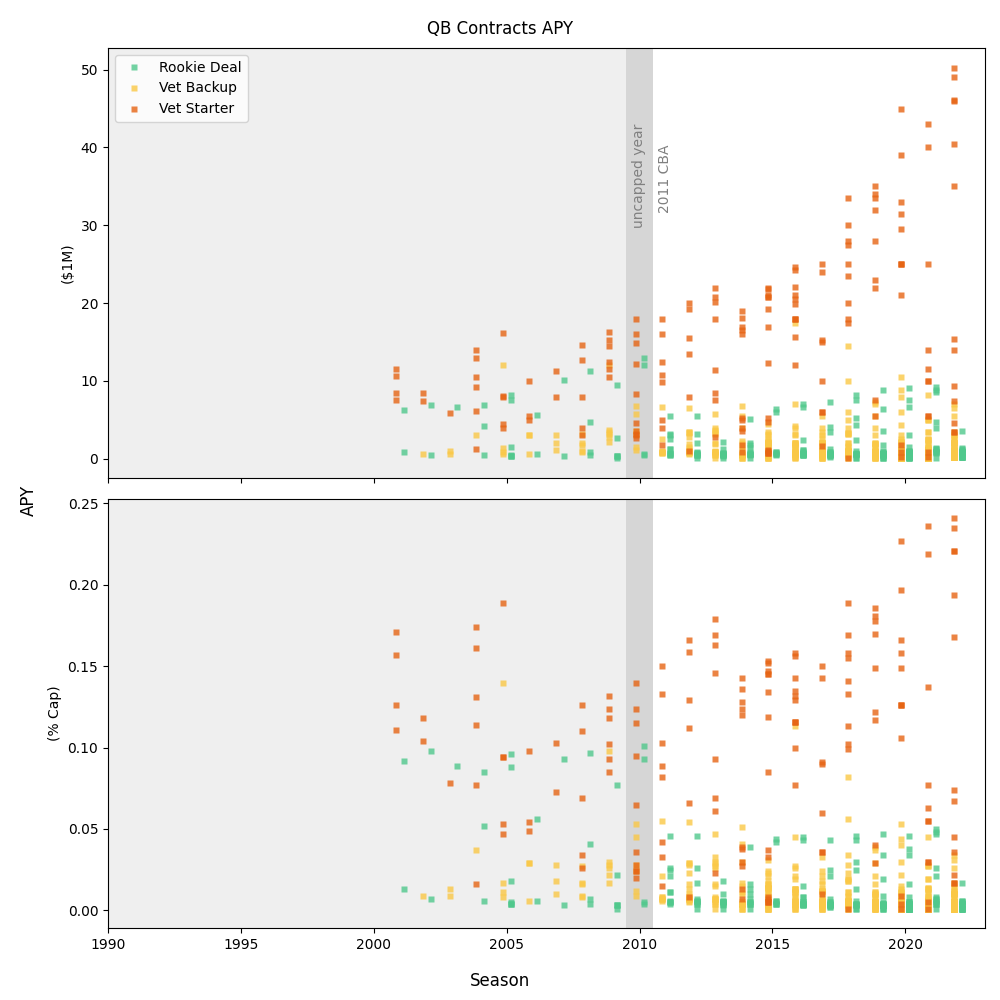

In [22]:
plot_opts = {\
             'linestyle' : 'None',\
             'alpha': 0.8,\
             'marker' :'s',\
             'markersize' : 4, \
             'markeredgecolor' : 'None',\
            }
            #  'cmap' : 'tab20c',\
            #  'clim' : [0, 12]\
            # }

color_rook1 = np.array([80, 200, 140])/255.0
color_vet1 = np.array([230, 100, 20])/255.0
color_backup1 = np.array([250, 200, 70])/255.0
    
fig, ax = plt.subplots(nrows = 2, ncols = 1, sharex=True, figsize=(10, 10))
ax[0].axvspan(2009.5, 2010.5, facecolor = '0.2', alpha = 0.2)
ax[0].axvspan(1990, 2009.5, facecolor = '0.7', alpha = 0.2)

ax[0].plot(y_rook+0.15, apy_rook, c=color_rook1, **plot_opts, label = 'Rookie Deal')
ax[0].plot(y_backup-0.15, apy_backup, c=color_backup1, **plot_opts, label = 'Vet Backup')
ax[0].plot(y_vet-0.15, apy_vet, c=color_vet1, **plot_opts, label = 'Vet Starter')

ax[0].text(2009.7, 30, 'uncapped year', color = [0.5, 0.5, 0.5], rotation=90)
ax[0].text(2010.7, 32, '2011 CBA', color = [0.5, 0.5, 0.5], rotation=90)

ax[0].set_ylabel('($1M)')
ax[0].legend()

ax[1].axvspan(2009.5, 2010.5, facecolor = '0.2', alpha = 0.2)
ax[1].axvspan(1990, 2009.5, facecolor = '0.7', alpha = 0.2)

ax[1].plot(y_rook+0.15, apy_pct_rook, c=color_rook1, **plot_opts)
ax[1].plot(y_backup-0.15, apy_pct_backup, c=color_backup1, **plot_opts)
ax[1].plot(y_vet-0.15, apy_pct_vet, c=color_vet1, **plot_opts)
ax[1].set_ylabel('(% Cap)')
ax[1].set_xlim([1990, 2023])
fig.supylabel('APY')
fig.supxlabel('Season')

# plt.tight_layout(pad=0, w_pad=0, h_pad=0);
plt.subplots_adjust(hspace=0.075,left=0.1, bottom=0.075)
plt.suptitle('QB Contracts APY')
plt.tight_layout()
plt.show()
plt.savefig('qb_contracts.png', dpi='figure', format='png')

#### Play with clickable figures with matplotlib

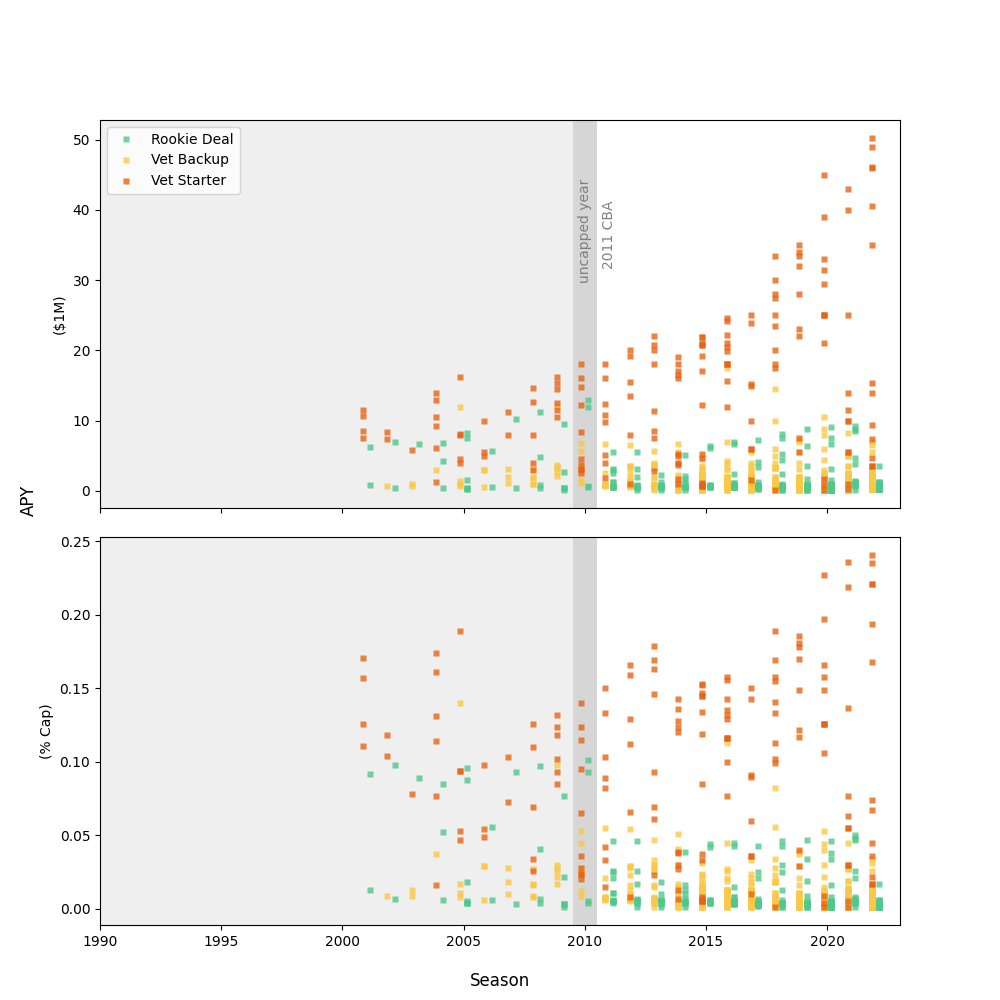

In [23]:
plot_opts = {\
             'linestyle' : 'None',\
             'alpha': 0.8,\
             'marker' :'s',\
             'markersize' : 4, \
             'markeredgecolor' : 'None',\
            }
            #  'cmap' : 'tab20c',\
            #  'clim' : [0, 12]\
            # }

color_rook1 = np.array([80, 200, 140])/255.0
color_vet1 = np.array([230, 100, 20])/255.0
color_backup1 = np.array([250, 200, 70])/255.0
    
fig, ax = plt.subplots(nrows = 2, ncols = 1, sharex=True, figsize=(10, 10))
ax[0].axvspan(2009.5, 2010.5, facecolor = '0.2', alpha = 0.2)
ax[0].axvspan(1990, 2009.5, facecolor = '0.7', alpha = 0.2)

pts_rook, = ax[0].plot(y_rook+0.15, apy_rook, c=color_rook1, **plot_opts, label = 'Rookie Deal')
pts_backup, = ax[0].plot(y_backup-0.15, apy_backup, c=color_backup1, **plot_opts, label = 'Vet Backup')
pts_vet, = ax[0].plot(y_vet-0.15, apy_vet, c=color_vet1, **plot_opts, label = 'Vet Starter')

txt1 = ax[0].text(2009.7, 30, 'uncapped year', color = [0.5, 0.5, 0.5], rotation=90)
ax[0].text(2010.7, 32, '2011 CBA', color = [0.5, 0.5, 0.5], rotation=90)

ax[0].set_ylabel('($1M)')
leg = ax[0].legend()

ax[1].axvspan(2009.5, 2010.5, facecolor = '0.2', alpha = 0.2)
ax[1].axvspan(1990, 2009.5, facecolor = '0.7', alpha = 0.2)

ax[1].plot(y_rook+0.15, apy_pct_rook, c=color_rook1, **plot_opts, label = 'Rookie Deal')
ax[1].plot(y_backup-0.15, apy_pct_backup, c=color_backup1, **plot_opts, label = 'Vet Backup')
ax[1].plot(y_vet-0.15, apy_pct_vet, c=color_vet1, **plot_opts, label = 'Vet Starter')
ax[1].set_ylabel('(% Cap)')
ax[1].set_xlim([1990, 2023])


fig.supylabel('APY')
fig.supxlabel('Season')

# plt.tight_layout(pad=0, w_pad=0, h_pad=0);
plt.subplots_adjust(hspace=0.075,left=0.1, bottom=0.075)


for leg_item in leg.get_lines():
    leg_item.set_picker(True)
    leg_item.set_pickradius(10)

# for pts0, pts1 in zip(ax[0].lines, ax[1].lines):
#     pts0.s

def on_pick(event):
    # On the pick event, find the original line corresponding to the legend
    # proxy line, and toggle its visibility.
    leg_item = event.artist
    
    match_idx = np.where([pts._label == leg_item._label for pts in ax[0].get_lines()])[0][0]

    pts0 = ax[0].get_lines()[match_idx]
    pts1 = ax[1].get_lines()[match_idx]
    
    is_visible = not pts0.get_visible()  # toggle visibility
    pts0.set_visible(is_visible)
    pts1.set_visible(is_visible)
    
    leg_item.set_alpha(1.0 if is_visible else 0.5)
    leg.get_texts()[match_idx].set_alpha(1.0 if is_visible else 0.3)
    fig.canvas.draw()

plt.connect('pick_event', on_pick)

plt.show()

## Plotly plotting

In [24]:
depth = qb_contracts_df['depth'].to_numpy(dtype=int)
print(depth)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 3 1 1 2 1 1 1 2 3
 1 1 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 2 2 2 1 1 2 1 1 1 1 2
 2 1 2 1 1 1 2 2 1 2 2 3 1 2 1 1 1 1 2 1 2 1 1 2 2 2 1 2 2 1 1 1 1 1 1 2 2
 2 2 1 2 1 2 2 2 2 2 1 1 2 2 1 2 2 2 3 2 1 2 2 2 2 1 2 3 2 2 2 2 3 1 2 3 2
 2 2 1 2 1 2 2 2 2 2 2 1 2 2 1 1 2 2 3 2 1 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2
 2 3 2 3 2 1 2 2 3 2 2 3 2 1 1 1 2 3 2 2 2 3 2 3 2 2 1 2 2 2 2 2 1 2 3 2 3
 2 2 2 3 2 2 2 2 2 2 1 2 2 2 3 2 2 2 2 2 2 2 3 2 3 2 2 2 2 2 2 2 2 2 2 2 1
 2 3 2 2 3 2 2 3 2 2 2 2 1 1 2 2 2 3 2 2 1 2 2 2 2 3 2 2 2 2 2 2 2 1 2 2 2
 2 2 3 1 2 2 2 3 2 2 2 2 1 3 2 3 3 3 3 3 3 2 3 3 3 1 2 2 2 1 2 2 3 2 2 2 2
 2 2 1 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 1 3 2 3 3 2 3 3 2 3 2 3 2 3 3 3 3 2
 2 2 3 2 3 3 3 3 3 2 3 3 2 2 2 2 3 3 2 3 3 3 2 2 3 3 3 3 3 3 2 2 2 3 3 2 2
 2 2 3 3 3 3 2 3 3 3 2 1 

In [45]:
depth = qb_contracts_df['depth'].to_numpy(dtype=int)

contract_type_conditions = [is_rookie_deal,
    (~ is_rookie_deal) & (depth==1),
    (~ is_rookie_deal) & (depth >1)
    ]

contract_types = ['Rookie deal', 'Vet Starter', 'Vet Backup']
qb_contracts_df['contract_type'] = np.select(contract_type_conditions, contract_types, default='')
qb_contracts_df['contract_type'].head()

0    Vet Starter
1    Vet Starter
2    Vet Starter
3    Vet Starter
4    Vet Starter
Name: contract_type, dtype: object

In [46]:
compact_columns(qb_contracts_df)
qb_contracts_df['player'].unique()[:10]

level_0                   index                     depth                     player                    position                  
team                      is_rookie_deal            is_active                 year_signed               years                     
value                     apy                       guaranteed                apy_cap_pct               inflated_value            
inflated_apy              inflated_guaranteed       player_page               otc_id                    date_of_birth             
height                    weight                    college                   draft_year                draft_round               
draft_overall             draft_team                cols                      full_name                 season                    


array(['Aaron Rodgers', 'Josh Allen', 'Russell Wilson', 'Patrick Mahomes',
       'Kyler Murray', 'Deshaun Watson', 'Dak Prescott', 'Derek Carr',
       'Carson Palmer', 'Ben Roethlisberger'], dtype=object)

In [47]:
import plotly.graph_objects as go
import plotly.express as px

In [140]:

df = qb_contracts_df[['player', 'contract_type', 'is_rookie_deal', 'year_signed', 'value', 'years', 'guaranteed', 'apy', 'apy_cap_pct', 'inflated_apy']]

contract_type_ids, contract_types_unique = pd.factorize(df['contract_type'], sort = True, size_hint=3)
[print(f'{ci} : {cu}') for ci, cu in zip(np.unique(contract_type_ids), contract_types_unique)]

df.insert(2, 'contract_type_id', contract_type_ids)
x_offset = 0.2
# df.loc[df['is_rookie_deal'], 'year_signed'] += x_offset


0 : Rookie deal
1 : Vet Backup
2 : Vet Starter


In [197]:
df.query('player == "Matt Ryan"')

,player,contract_type,contract_type_id,is_rookie_deal,year_signed,value,years,guaranteed,apy,apy_cap_pct,inflated_apy
24,Matt Ryan,Vet Starter,2,False,2018,150.00,5.0,100.00,30.00,0.169,38.092551
25,Matt Ryan,Vet Starter,2,False,2013,103.75,5.0,59.00,20.75,0.169,37.957317
119,Matt Ryan,Rookie deal,0,True,2008,67.50,6.0,34.75,11.25,0.097,21.821121


In [141]:
#field_color = '#003a00'
# text_color = '#99bb99'

field_color = 'rgb(0,58,0)'
text_color = 'rgba(200, 200, 200, 0.7)'

In [199]:

fig = go.Figure()

# '#f9e394', '#ee0000', '#6ed2f8'

# contract_plot_styles = dict(name = 'Vet Starter'
#     marker_style = dict(
#         symbol = 'square-open',
#         color = '#f9e394'
#         )
# )
cat_symbols = ['circle-open', 'x-thin-open', 'square-open']
cat_colors = ['#6ed2f8', '#f9e394','#eeeeee']
x_offset = 0.25

fig.add_vrect(2009.5, 2010.5,
    fillcolor = text_color,
    opacity = 0.8,
    layer='below',
    line = dict(width = 0.5, color = text_color)
    )

fig.add_annotation(
    x = 2010,
    y = 37,
    text = 'uncapped year',
    height =24,
    valign = 'middle',
    xshift=8,
    font = dict(
        color = field_color,
        size = 24
    ),
    textangle = -90,
    )

fig.add_annotation(
    x = 2011,
    y = 36,
    text = '2011 CBA',
    height =24,
    valign = 'middle',
    xshift=8,
    font = dict(
        color = text_color,
        size = 24
    ),
    textangle = -90,
    )


for cidx, clabel, marker_sym in zip(np.unique(contract_type_ids), contract_types_unique, cat_symbols):
    marker_dict = dict(
        symbol=marker_sym,
        size=8,
        line=dict(width=2),
        opacity=0.8
    )

    style_dict = {
        'mode':'markers',
        'marker': marker_dict   
        }

    cdata = df[df['contract_type_id']==cidx][['player', 'year_signed', 'value', 'years', 'guaranteed', 'apy', 'apy_cap_pct']]
    cdata['apy_cap_pct'] = cdata['apy_cap_pct'].apply(lambda x: np.around(100*x,1))
    cdata[['apy','guaranteed']] = cdata[['apy','guaranteed']].apply(lambda x: np.around(x,1))

    cdata.to_numpy()

    # if clabel == 'Rookie deal':
    #     hovtemp = "<br>%{customdata[0]}, %{customdata[1]} \
    #         <br> $%{customdata[2]}M/%{customdata[3]}yr ($%{customdata[4]}M guaranteed)"
    # else:
    hovtemp ="<br>%{customdata[0]}, %{customdata[1]} \
        <br> $%{customdata[2]}M/%{customdata[3]}yr ($%{customdata[4]}M guaranteed) \
        <br> $%{customdata[5]}M APY"

    fig.add_trace(
        go.Scatter(
            name = clabel, 
            x = df[df['contract_type_id']==cidx]['year_signed']+(x_offset*(cidx-1)), y = df[df['contract_type_id']==cidx]['apy'],
            customdata = cdata,
            **style_dict,
            hovertemplate=hovtemp,
            # hovertemplate='<br>'.join(["\%{customdata[0]} (\%{customdata[1]})", 
            #     "\%{customdata[2]}M / \%{customdata[3]} yrs", 
            #     "\%{customdata[4]}M APY (\%{customdata[5]:.1f}) pct cap))"
            # ])
        )
    )


  

# plotly ticklabelposition option seems to break vs code
for ylabel in range(10, 51, 10):
    fig.add_annotation(
        x = 1999,
        y = ylabel + 1.5,
        text = str(ylabel),
        font = dict(
            size = 24
        ),
        # textangle = -90,
        showarrow=False
    )

# fig.layout.template='seaborn'
fig.layout.height = 500
fig.layout.width = 1200

fig.update_xaxes(
    range = (1998.1, 2023.9),
    fixedrange=True,
    showgrid=False,
    tickmode = 'linear',
    tick0 = 2000,
    dtick = 5,
    minor = dict(ticklen = 5, nticks = 5, tickcolor = text_color, tickwidth=2)

    )

fig.update_yaxes(
    range = (0,57.5),
    fixedrange=True,
    gridwidth=2,
    gridcolor = text_color,
    zeroline = True,
    zerolinewidth = 2,
    zerolinecolor = text_color,
    showticklabels = False
    )

fig.update_layout(
    height = 600,
    width = 1200,
    margin = dict(l=5, r=5, t=10, b=5),
    paper_bgcolor = field_color,
    plot_bgcolor = field_color,
    colorway = cat_colors,
    font = dict(
        family = 'Courier',
        color = text_color,
        size = 16
    ),
    legend=dict(
        yanchor="top",
        y=0.855,
        xanchor="left",
        x=0.1
    )
)



# fig.add_trace(
#     go.Scatter(
#         name = 'Vet Starter Contracts', 
#         x = df['year_signed'].iloc[vet_starter_idx], y = df['apy'].iloc[vet_starter_idx]
#         )
# )

# fig.add_trace(
#     go.Scatter(
#         name = 'Vet Backup Contracts', 
#         x = df['year_signed'].iloc[vet_backup_idx], y = df['apy'].iloc[vet_backup_idx]
#         )
# )


fig.show()



In [210]:
pfr_df = nfl.import_pfr('pass')
ngs_df = nfl.import_ngs_data(stat_type= 'rushing', years = [2022])

In [211]:
# compact_columns(pfr_df)
compact_columns(ngs_df)

season                    season_type               week                      player_display_name       player_position           
team_abbr                 avg_time_to_throw         avg_completed_air_yards   avg_intended_air_yards    avg_air_yards_differential 
aggressiveness            max_completed_air_distance avg_air_yards_to_sticks   attempts                  pass_yards                
pass_touchdowns           interceptions             passer_rating             completions               completion_percentage     
expected_completion_percentage completion_percentage_above_expectation avg_air_distance          max_air_distance          player_gsis_id            


In [207]:
pfr_df[pfr_df['season'] == 2022]

,player,team,pass_attempts,throwaways,spikes,drops,drop_pct,bad_throws,bad_throw_pct,season,...,on_tgt_throws,on_tgt_pct,rpo_plays,rpo_yards,rpo_pass_att,rpo_pass_yards,rpo_rush_att,rpo_rush_yards,pa_pass_att,pa_pass_yards
435,Patrick Mahomes,KC,622.0,31.0,0.0,32.0,5.4,93.0,15.7,2022,...,455.0,77.0,81.0,570.0,77.0,562.0,3.0,8.0,129.0,1155.0
436,Tom Brady,TB,716.0,20.0,4.0,30.0,4.3,111.0,16.0,2022,...,510.0,73.7,18.0,126.0,18.0,126.0,0.0,0.0,113.0,861.0
437,Justin Herbert,LAC,662.0,24.0,2.0,34.0,5.3,84.0,13.2,2022,...,483.0,75.9,35.0,285.0,35.0,285.0,0.0,0.0,166.0,1240.0
438,Kirk Cousins,MIN,623.0,27.0,3.0,24.0,4.0,90.0,15.2,2022,...,451.0,76.1,19.0,145.0,18.0,145.0,0.0,0.0,182.0,1221.0
439,Joe Burrow,CIN,564.0,15.0,2.0,26.0,4.8,69.0,12.6,2022,...,434.0,79.3,57.0,404.0,50.0,386.0,2.0,18.0,85.0,591.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,Christian Kirk,JAX,1.0,0.0,0.0,0.0,0.0,1.0,100.0,2022,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
532,Cooper Kupp,LAR,1.0,0.0,0.0,0.0,0.0,1.0,100.0,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
533,James Proche,BAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022,...,1.0,100.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
534,Tommy Townsend,KC,1.0,0.0,0.0,0.0,0.0,1.0,100.0,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [217]:
pfr_df[pfr_df['season']==2022][['player', 'pass_attempts']].hist(column='pass_attempts')

ValueError: Plotly Express cannot process wide-form data with columns of different type.

In [32]:

fig = px.scatter(df, x = 'year_signed', y = 'apy', color = 'contract_type',
    custom_data = ['player', 'apy', 'apy_cap_pct'],
    hover_name = df['player'],
    template='seaborn')

fig.update_traces(
    hovertemplate="<br>".join([
        "%{customdata[0]}",
        "$%{customdata[1]:.2f}M"
    ])
)
fig.show()

In [33]:
ax[0].lines

<Axes.ArtistList of 3 lines>

In [34]:
qb_contracts_df_2[qb_contracts_df_2['player']=='Tony Romo'].head(13)

NameError: name 'qb_contracts_df_2' is not defined

In [ ]:
qb_depth_df_2[qb_depth_df_2['full_name']=='Carson Wentz'].sort_values(['season', 'week'])

In [ ]:
pbp = nfl.import_pbp_data([2021])

In [ ]:
pbp.head()

In [ ]:
season = nfl.import_seasonal_data([2021])

In [ ]:
season.columns

In [ ]:
season.games